# Box-Mueller Transformation

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import Image, display
display(Image(url=r"https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Box-Muller_transform_visualisation.svg/768px-Box-Muller_transform_visualisation.svg.png",width=500,height=500))

The Box-Mueller algorithm generates a sample from the bivariate standard normal, each component of which is thus a univariate standard normal. The method is based on the following two properties of the bivariate normal distribution:

If $Z\sim N(0,I)$ then:

1. $R^2=Z_1^2+Z_2^2 \sim \chi_{(2)}=\Gamma(1,2)=exp(2)$, i.e. $P(Z\leq x)=1-e^{-x/2}$


2. Given $R^2$, the point $(Z_1,Z_2)$ is uniformly distributed on the circle of radius $R$ centered at the origin $O\;(0,0)$.

Thus, to generate $(Z_1,Z_2)$ we may first generate $R^2$ and then sample a point uniformly from the circle of radius $R$. 

To sample from the exponential distribution, we can use the inverse CDF transformation method and let $R^2=-2ln(U_1)\sim exp(2)$, with $U_1\sim Uniform(0,1)$.

To generate a random point on a circle, we can generate a random angle uniformly distributed between $0\;\text{and}\;2\pi\;\text{as}\;\Theta\sim Uniform(0,2\pi)$, and then map the angle to a point on the circle. We can easily generate $\Theta$ be letting $\Theta=2\pi U_2$, with $U_2\sim Uniform(0,1)$.

Then, from the polar coordinates transformation, the corresponding point on the circle $O\;(R,\Theta)$ will be: $(Z_1,Z_2)=(R\cos{\Theta},R\sin{\Theta})$.

To sum up, the Box-Mueller Algorithm to generate a sample from the Bivariate Standard Normal is given by the following steps:

1. Generate $U_1,U_2 \sim Uniform(0,1)$

2. Let $R^2=-2ln(U_1)\sim exp(2)$

3. Let $\Theta=2\pi U_2\sim Uniform(0,2\pi)$

4. $(Z_1,Z_2)=(R\cos{\Theta},R\sin{\Theta})$

Then, $Z=(Z_1,Z_2)\sim N(0,I)$.


# Step 1: Linear Congruential Algorithm for Unifrom r.v Generation

First, instead of sampling Uniform random variables using a built-in random number generator, we generate them using a linear congruential algorithm with poor lattice properties. The LCA we use is:

$x_{n+1}=(16807x_n+263) mod 10000$

In [3]:
#Set the multiplier of the LCA
a=168070
#Set a large prime number as the modulus
m=2**31-1
#Set the initial seed for the random number generator
x0=10000
#Size of random numbers to generate
n=10000
#Vectorize X to initialize an array of ones and multiply element-wise by (a*x0)%m.
# (a*x0)%m represents the initial iteration of the LCA, where x0 is multiplied by a and then taken modulo m to ensure the result 
#falls within the range of [0, m-1]. This initializes the first element of X with the first random number.
X=np.ones(n)*((a*x0)%m)
for i in range(1,n):
    X[i]=(a*X[i-1]+263)%m
#Divide by m to obtain a sequence of uniform random numbers (U):
#Each element of X is divided by m to normalize the values to the range [0, 1].
#This step converts the sequence of generated numbers to a sequence of random variables uniformly distributed between 0 and 1.
U=X/m
#Splitting U in half to obtain the two Uniform (0,1) Random Variables
U1=U[:5000]
U2=U[5000:]


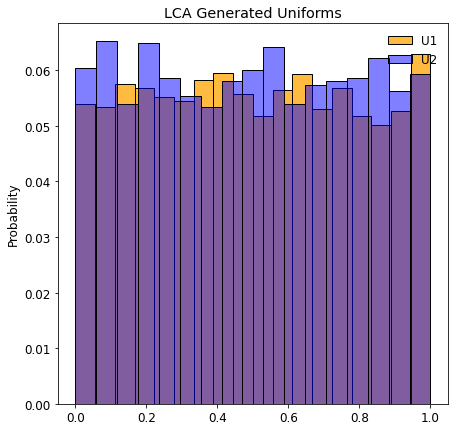

In [4]:
plt.rcParams.update({"font.size": 12})
plt.figure(figsize=(7,7))
sns.histplot(U1,color="orange",label="U1",stat="probability")
sns.histplot(U2,color="blue",label="U2",stat="probability",alpha=0.5)
plt.legend(frameon=False)
plt.title("LCA Generated Uniforms")
plt.show()

# Step 2: Box-Mueller Transformation

Now, we use the 5,000 pairs of Uniform (0,1) r.v generated from the LCA to generate 5,000 bivariate normal r.v using the Box-Mueller algorithm:

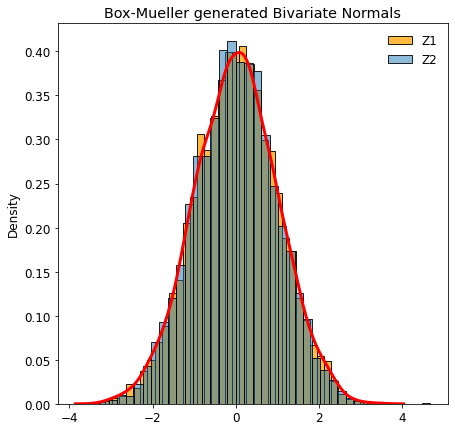

In [5]:
#Polar Coordinates Transformation
Z1=np.sqrt(-2*np.log(U1))*np.cos(2*pi*U2)
Z2=np.sqrt(-2*np.log(U1))*np.sin(2*pi*U2)
plt.figure(figsize=(7,7))
sns.histplot(Z1,color="orange",label="Z1",bins=40,stat="density")
sns.kdeplot(Z1,color="red",linewidth=3)
sns.histplot(Z2,alpha=0.5,label="Z2",bins=40,stat="density")
plt.legend(frameon=False)
plt.title("Box-Mueller generated Bivariate Normals")
plt.show()

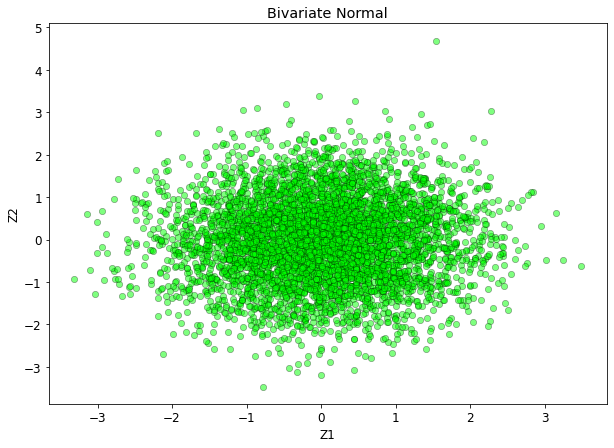

In [6]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=Z1,y=Z2,color="lime",edgecolor="black",alpha=0.5,s=40)
plt.xlabel("Z1")
plt.ylabel("Z2")
plt.title("Bivariate Normal")
plt.show()

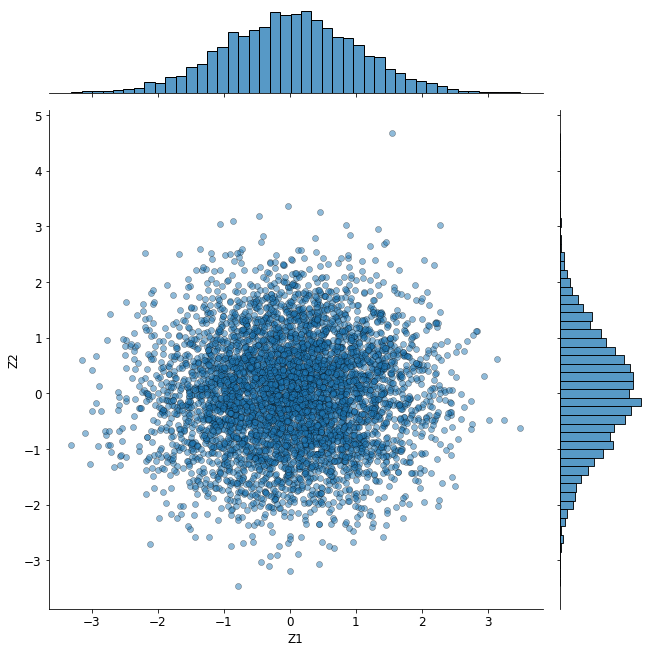

In [7]:
ax=sns.jointplot(x=Z1,y=Z2,height=9,edgecolor="black",alpha=0.5)
ax.set_axis_labels("Z1","Z2")
plt.show()